# **1**

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import torch
from torch import nn, optim
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
import time
from sklearn.decomposition import PCA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive




> # 1.1





In [3]:
FILE_PATH_1 = '/content/drive/MyDrive/University/nn/house-prices.csv'

In [4]:
TARGET_COLUMN1 = 'SalePrice'

In [195]:
house_price_raw_df = pd.read_csv(FILE_PATH_1)
house_price_raw_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [9]:
house_price_raw_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
house_price_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
meaning_full_missing_value_columns = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                                 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 
                                 'Fence', 'MiscFeature']

In [6]:
def handle_missing_values(house_price_df):
  missing_value_percentage = calculate_missing_values(house_price_df)
  high_missing_value_columns = missing_value_percentage[missing_value_percentage>95].keys()
  for column in high_missing_value_columns:
    house_price_df.drop(column, axis=1, inplace=True)
  handle_meaning_full_missing_values(house_price_df, high_missing_value_columns)
  missing_value_percentage = calculate_missing_values(house_price_df)
  house_price_numeric_columns, house_price_categoric_columns = seperate_columns(house_price_df)
  handle_numeric_missing_values(house_price_df, house_price_numeric_columns)
  missing_value_percentage = calculate_missing_values(house_price_df)
  handle_categoruc_missing_values(house_price_df, missing_value_percentage)

  return house_price_numeric_columns, house_price_categoric_columns

In [7]:
def handle_meaning_full_missing_values(house_price_df, high_missing_value_columns):
  for column in meaning_full_missing_value_columns:
    if column not in high_missing_value_columns: 
      house_price_df[column].fillna('None', inplace=True)

In [8]:
def calculate_missing_values(house_price_df):
  missing_value_percentage = house_price_df.isnull().sum() * 100 / len(house_price_df)
  missing_value_percentage = missing_value_percentage.sort_values(ascending=False)
  return missing_value_percentage

In [9]:
def seperate_columns(house_price_df):
  house_price_columns_type = house_price_df.dtypes
  house_price_numeric_columns = house_price_columns_type[(house_price_columns_type == int) | (house_price_columns_type == float)].keys()
  house_price_categoric_columns = house_price_columns_type[house_price_columns_type == object].keys()
  return house_price_numeric_columns, house_price_categoric_columns

In [10]:
def handle_numeric_missing_values(df, columns,  fill_type = 'mean'):
  for column in columns:
    if fill_type == 'median':
      df[column].fillna(df[column].median(), inplace=True)
    elif fill_type == 'mean':
      df[column].fillna(df[column].mean(), inplace=True)
    elif fill_type == 'mode':
      df[column].fillna(df[column].mode(), inplace=True)


In [11]:
def handle_categoruc_missing_values(df, missing_value_percentage):
  cat_missing_value_columns = missing_value_percentage[missing_value_percentage>0].keys()
  for column in cat_missing_value_columns:
    df[column].fillna(df[column].mode(), inplace=True)

In [12]:
def label_encode(data, columns):
  le = preprocessing.LabelEncoder()
  labeled_data = data.copy()
  for column in columns:
    labeled_data[column] = le.fit_transform(labeled_data[column])
  return labeled_data

In [13]:
def one_hot_encode(data, columns):
  labeled_data = data.copy()
  for column in columns:
    new_columns = pd.get_dummies(labeled_data[column], prefix=column)
    labeled_data = labeled_data.drop(columns =[column])
    labeled_data = pd.concat([labeled_data, new_columns], axis=1)
  return labeled_data

In [14]:
def encode_columns(data, categoric_columns):
  one_hot_cols = []
  label_cols = []
  for col in categoric_columns:
    category_num = len(data[col].unique())
    if category_num > 2:
      one_hot_cols.append(col)
    else:
      label_cols.append(col)
  data = one_hot_encode(data, one_hot_cols)
  data = label_encode(data, label_cols)
  return data

In [15]:
def normalize(data, numeric_columns):
  for col in numeric_columns:
    if col != TARGET_COLUMN1:
      min = data[col].min()
      max = data[col].max()
      data[col] = (data[col] - min) / (max - min)

In [279]:
def preprocess_regressor_data(raw_df):
  house_price_df = raw_df.copy()
  house_price_df.drop('Id', axis=1, inplace=True)

  house_price_numeric_columns, house_price_categoric_columns = handle_missing_values(house_price_df)  
  
  normalize(house_price_df, house_price_numeric_columns)

  house_price_df[TARGET_COLUMN1] = np.log(house_price_df[TARGET_COLUMN1])

  new_df = encode_columns(house_price_df, house_price_categoric_columns)
  house_price_df = new_df.copy()
  return house_price_df

> # 1.2

In [17]:
def split_data(df, test_percentage, target_column):
  train_x, test_x, train_y, test_y = train_test_split(df.drop(target_column, axis=1), 
                                                                  df[target_column], test_size=test_percentage, random_state=42, shuffle=True)
  return train_x, test_x, train_y, test_y

In [18]:
def convert_dataframe_to_dataset(x_df, y_df):
  target_tensor = torch.tensor(y_df.values)
  features_tensor = torch.tensor(x_df.values)
  return torch.utils.data.TensorDataset(features_tensor, target_tensor)

In [19]:
def convert_dataset_to_dataloader(dataset, batch_size):
  data_loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=batch_size)
  return data_loader

In [20]:
def prepare_regressor_data(raw_df, batch_size, test_percentage):
  df = preprocess_regressor_data(raw_df)
  train_x, test_x, train_y, test_y = split_data(df, test_percentage, TARGET_COLUMN1)
  train_dataset = convert_dataframe_to_dataset(train_x, train_y)
  test_dataset = convert_dataframe_to_dataset(test_x, test_y)
  train_loader = convert_dataset_to_dataloader(train_dataset, batch_size)
  test_loader = convert_dataset_to_dataloader(test_dataset, batch_size)
  return train_loader, test_loader, df.shape


In [21]:
class Regressor(nn.Module):
  def __init__(self, layers_size, activation_func):
    super().__init__()
    self.fc_layers = nn.ModuleList()
    for i in range(len(layers_size)-1):
      self.fc_layers.append(nn.Linear(layers_size[i], layers_size[i+1]))
    self.activation_func = activation_func

  def forward(self, input):
    for i in range(len(self.fc_layers)-1):
      input = self.fc_layers[i](input)
      input = self.activation_func(input)
    
    output = self.fc_layers[-1](input)
    return output.squeeze()

In [22]:
def test_regressor(model, test_loader, main_loss_type, main_loss_func, other_loss_type, other_loss_func):
  all_test_losses = {'MSE' : [], 'MAE' : []}
  test_outs = []
  test_targets = []
  with torch.no_grad():
    for features, targets in test_loader:
      prediction = model(features.float())
      all_test_losses[main_loss_type].append(main_loss_func(prediction, targets.float()).item())
      all_test_losses[other_loss_type].append(other_loss_func(prediction, targets.float()).item())
      test_outs.append(prediction)
      test_targets.append(targets)
  return np.mean(all_test_losses[main_loss_type]), np.mean(all_test_losses[other_loss_type]), test_outs, test_targets

In [23]:
def run_regressor(model, loss_type, optimizer, train_loader, test_loader, epochs):
  if loss_type == 'MSE':
    main_loss_type = 'MSE'
    other_loss_type = 'MAE'
    main_loss_func = nn.MSELoss()
    other_loss_func = nn.L1Loss()
  else:
    main_loss_type = 'MAE'
    other_loss_type = 'MSE'
    main_loss_func = nn.L1Loss()
    other_loss_func = nn.MSELoss()
  all_train_losses = {'MSE' : [], 'MAE' : []}
  all_test_losses = {'MSE' : [], 'MAE' : []}
  all_test_outs = []
  all_test_targets = []
  for epoch in range(1, epochs+1):
    # print('Epoch :{} started...'.format(epoch))
    epoch_train_losses = {'MSE' : [], 'MAE' : []}
    for features, targets in train_loader:
      optimizer.zero_grad()
      prediction = model(features.float())
      main_loss = main_loss_func(prediction, targets.float())
      main_loss.backward()
      optimizer.step() 
      epoch_train_losses[main_loss_type].append(main_loss.item())
      with torch.no_grad():
        other_loss = other_loss_func(prediction, targets.float())
        epoch_train_losses[other_loss_type].append(other_loss.item())
    all_train_losses[main_loss_type].append(np.mean(epoch_train_losses[main_loss_type]))
    all_train_losses[other_loss_type].append(np.mean(epoch_train_losses[other_loss_type]))
    main_test_loss, other_test_loss, test_out, test_target = test_regressor(model, test_loader, main_loss_type, main_loss_func, other_loss_type, other_loss_func)
    all_test_losses[main_loss_type].append(main_test_loss)
    all_test_losses[other_loss_type].append(other_test_loss)
    all_test_outs.append(test_out)
    all_test_targets.append(test_target)
  print('Done!')
  return all_train_losses, all_test_losses, all_test_outs, all_test_targets
     

In [24]:
def plot_regressor_losses(train_losses, test_losses, epochs):
  fig, (ax1, ax2) = plt.subplots(2)
  fig.set_figheight(10)
  fig.set_figwidth(12)
  fig.tight_layout(pad=5.0)

  metric = 'MSE'
  ax1.plot(range(1, epochs+1), train_losses[metric], test_losses[metric])
  ax1.set_title(metric)
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.legend(['train', 'test'])

  metric = 'MAE'
  ax2.plot(range(1, epochs+1), train_losses[metric], test_losses[metric])
  ax2.set_title(metric)
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Loss')
  ax2.legend(['train', 'test'])
        
  fig.show()

In [25]:
def plot_regressor_outs(final_test_out, final_test_target):
  fig = plt.figure(figsize=(8, 8))
  predictions = np.array([])
  for out in final_test_out:
    predictions = np.append(predictions, out.numpy())

  targets = np.array([])
  for target in final_test_target:
    targets = np.append(targets, target.numpy())

  sns.scatterplot(x=targets, y=predictions, palette='pastel')
  plt.xlabel('targets')
  plt.ylabel('predictions')

In [281]:
BATCH_SIZE = 64
EPOCH = 200

# prepare data
regressor_train_loader, regressor_test_loader, regressor_final_df_shape = prepare_regressor_data(house_price_raw_df, BATCH_SIZE, 0.2)
REGRESSOR_FEATURE_SIZE = regressor_final_df_shape[1]-1

**Model : [291, 256, 128, 64, 32, 16, 1], Relu**

---



In [282]:
# define model
regressor1 = Regressor([REGRESSOR_FEATURE_SIZE, 256, 128, 64, 32, 16, 1], activation_func=nn.ReLU())
print(regressor1)

# train, test model
all_train_losses_regressor1, all_test_losses_regressor1, test_outs_regressor1, test_targets_regressor1 = run_regressor(regressor1, 'MSE', optim.Adam(regressor1.parameters(), lr=0.002), regressor_train_loader, regressor_test_loader, EPOCH)

Regressor(
  (fc_layers): ModuleList(
    (0): Linear(in_features=290, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): Linear(in_features=16, out_features=1, bias=True)
  )
  (activation_func): ReLU()
)
Done!


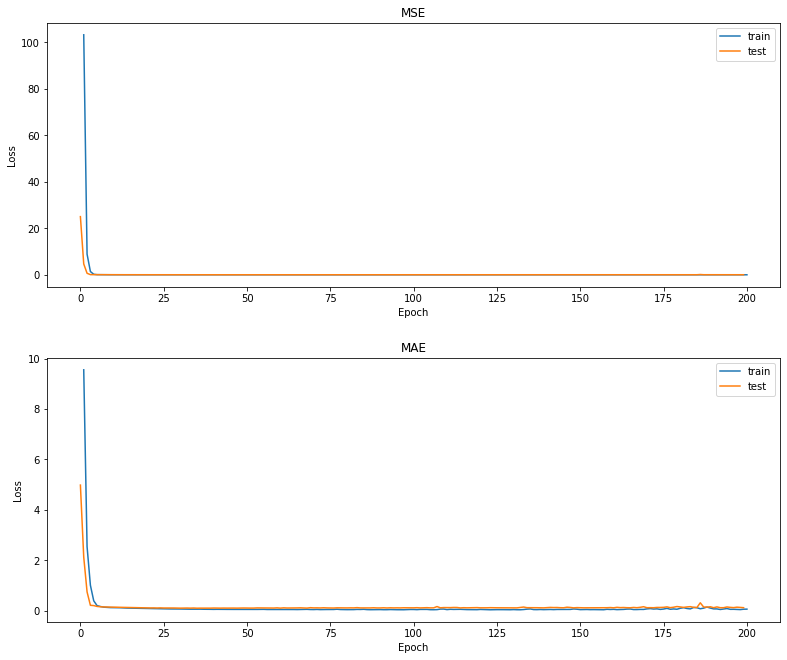

In [283]:
plot_regressor_losses(all_train_losses_regressor1, all_test_losses_regressor1, EPOCH)

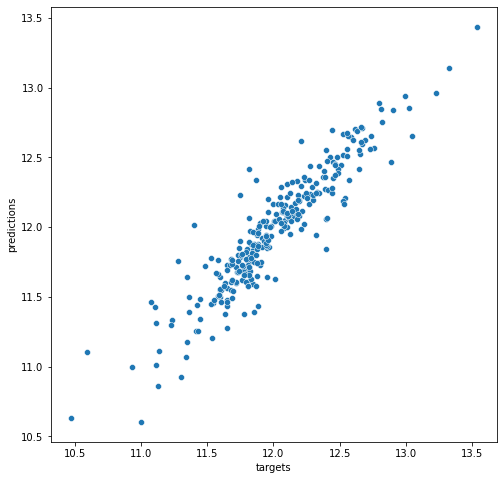

In [284]:
plot_regressor_outs(test_outs_regressor1[-1], test_targets_regressor1[-1])

**Model : [291, 200, 100, 20, 1], Relu**

---

In [285]:
# define model
regressor2 = Regressor([REGRESSOR_FEATURE_SIZE, 200, 100, 20, 1], activation_func=nn.ReLU())
print(regressor2)

# train, test model
all_train_losses_regressor2, all_test_losses_regressor2, test_outs_regressor2, test_targets_regressor2 = run_regressor(regressor2, 'MSE', optim.Adam(regressor2.parameters(), lr=0.002), regressor_train_loader, regressor_test_loader,  EPOCH)

Regressor(
  (fc_layers): ModuleList(
    (0): Linear(in_features=290, out_features=200, bias=True)
    (1): Linear(in_features=200, out_features=100, bias=True)
    (2): Linear(in_features=100, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=1, bias=True)
  )
  (activation_func): ReLU()
)
Done!


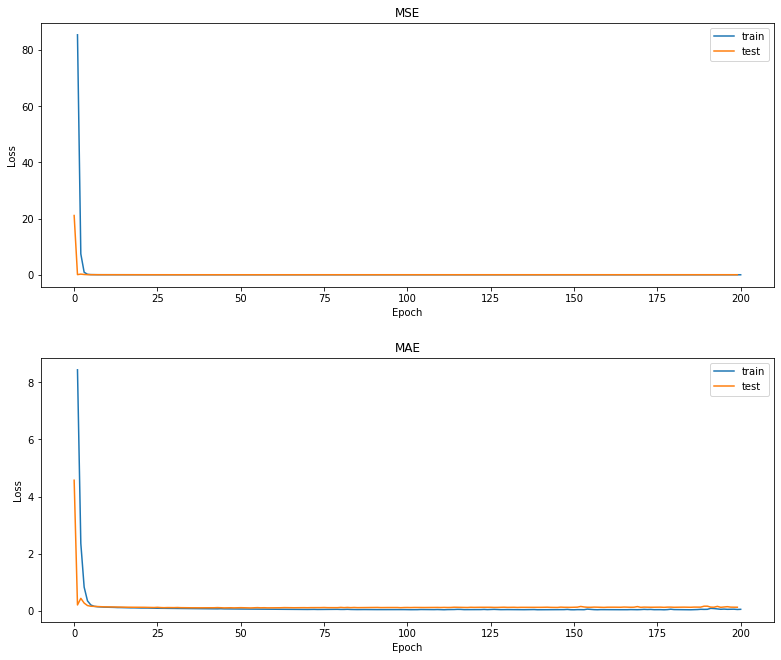

In [286]:
plot_regressor_losses(all_train_losses_regressor2, all_test_losses_regressor2, EPOCH)

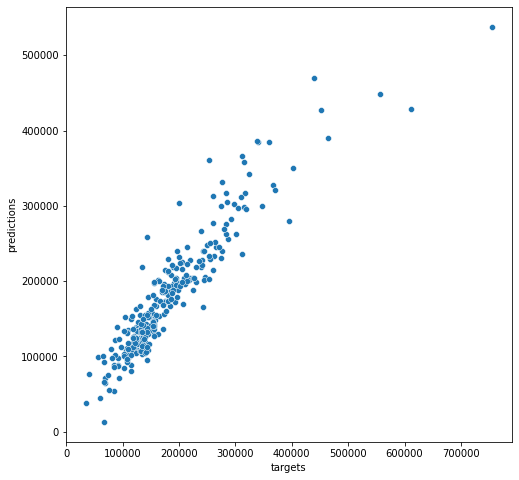

In [149]:
plot_regressor_outs(test_outs_regressor2[-1], test_targets_regressor2[-1])

**Model : [291, 256, 128, 64, 32, 16, 1], Tanh**

In [287]:
# define model
regressor3 = Regressor([REGRESSOR_FEATURE_SIZE, 256, 128, 64, 32, 16, 1], activation_func=nn.Tanh())
print(regressor3)

# train, test model
all_train_losses_regressor3, all_test_losses_regressor3, test_outs_regressor3, test_targets_regressor3 = run_regressor(regressor3, 'MSE', optim.Adam(regressor3.parameters(), lr=0.002), regressor_train_loader, regressor_test_loader,  EPOCH)

Regressor(
  (fc_layers): ModuleList(
    (0): Linear(in_features=290, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): Linear(in_features=16, out_features=1, bias=True)
  )
  (activation_func): Tanh()
)
Done!


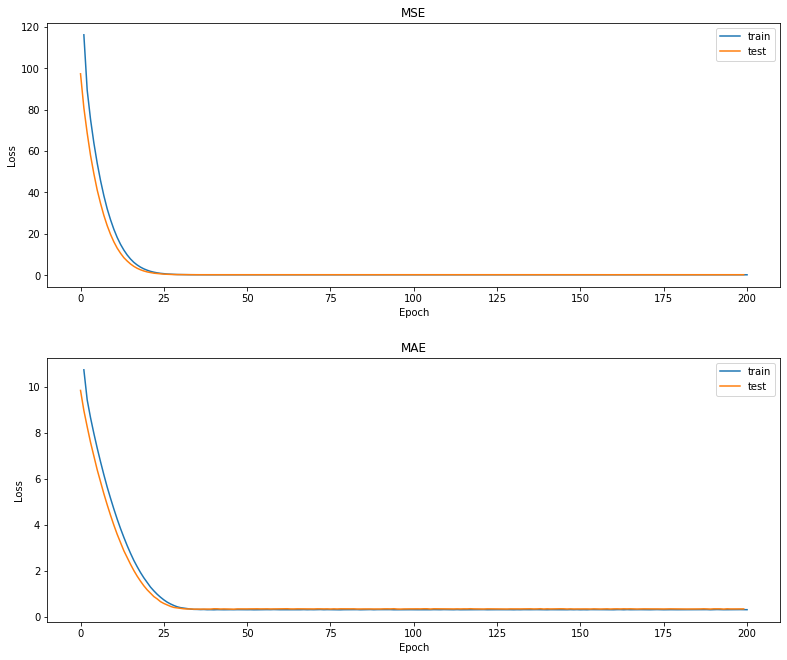

In [288]:
plot_regressor_losses(all_train_losses_regressor3, all_test_losses_regressor3, EPOCH)

**Model : [291, 200, 100, 20, 1], Tanh**

In [291]:
# define model
regressor3 = Regressor([REGRESSOR_FEATURE_SIZE, 256, 200, 100, 20, 1], activation_func=nn.Tanh())
print(regressor3)

# train, test model
all_train_losses_regressor3, all_test_losses_regressor3, test_outs_regressor3, test_targets_regressor3 = run_regressor(regressor3, 'MSE', optim.Adam(regressor3.parameters(), lr=0.002), regressor_train_loader, regressor_test_loader,  EPOCH)

Regressor(
  (fc_layers): ModuleList(
    (0): Linear(in_features=290, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
    (3): Linear(in_features=100, out_features=20, bias=True)
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
  (activation_func): Tanh()
)
Done!


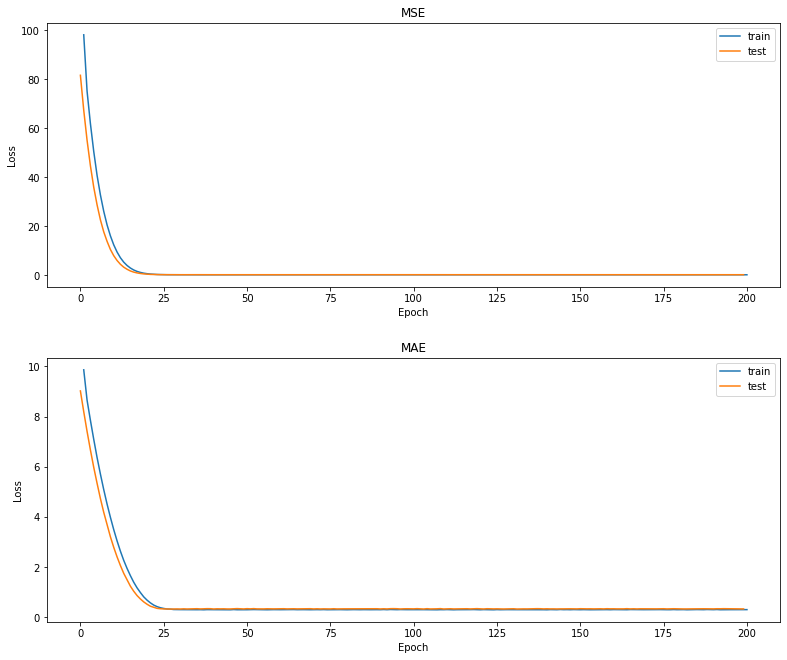

In [293]:

plot_regressor_losses(all_train_losses_regressor3, all_test_losses_regressor3, EPOCH)

In [147]:
# define model
regressor7 = Regressor([REGRESSOR_FEATURE_SIZE, 200, 10, 1], activation_func=nn.ReLU())
print(regressor7)

# train, test model
all_train_losses_regressor7, all_test_losses_regressor7, test_outs_regressor7, test_targets_regressor7 = run_regressor(regressor7, 'MSE', optim.Adam(regressor7.parameters(), lr=0.002), regressor_train_loader, regressor_test_loader,  EPOCH)

Regressor(
  (fc_layers): ModuleList(
    (0): Linear(in_features=290, out_features=200, bias=True)
    (1): Linear(in_features=200, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
  (activation_func): ReLU()
)
Done!


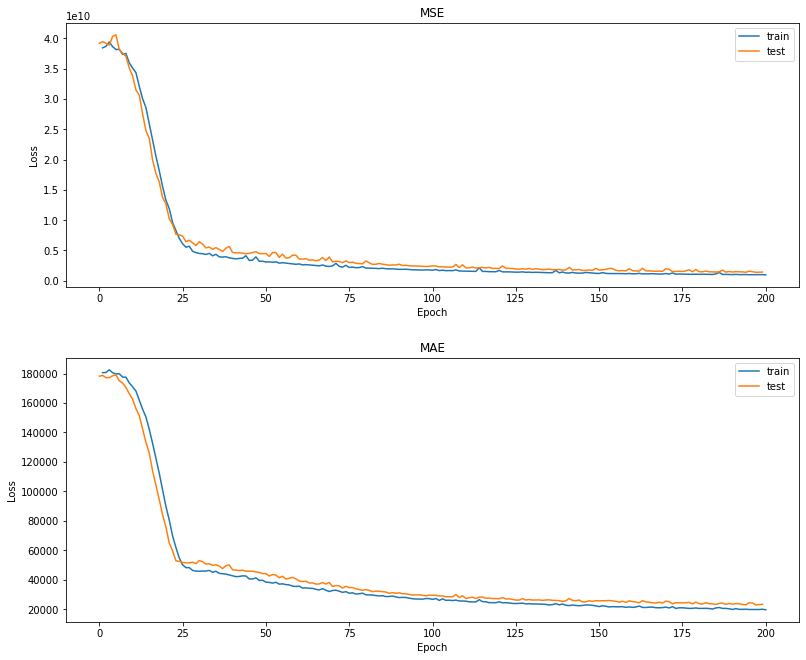

In [150]:
plot_regressor_losses(all_train_losses_regressor7, all_test_losses_regressor7, EPOCH)

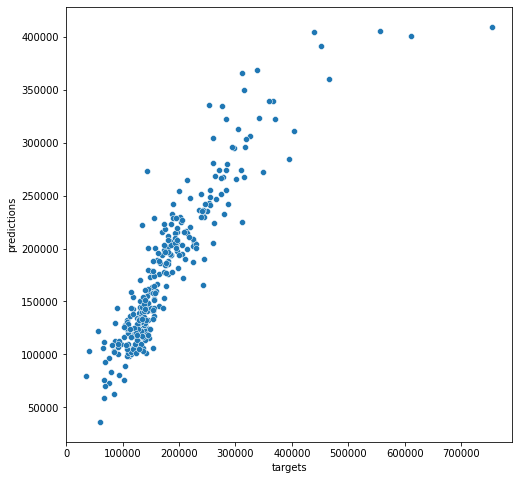

In [151]:
plot_regressor_outs(test_outs_regressor7[-1], test_targets_regressor7[-1])

In [296]:
# define model
regressor3 = Regressor([REGRESSOR_FEATURE_SIZE, 200, 10, 1], activation_func=nn.Tanh())
print(regressor3)

# train, test model
all_train_losses_regressor3, all_test_losses_regressor3, test_outs_regressor3, test_targets_regressor3 = run_regressor(regressor3, 'MSE', optim.Adam(regressor3.parameters(), lr=0.002), regressor_train_loader, regressor_test_loader,  EPOCH)

Regressor(
  (fc_layers): ModuleList(
    (0): Linear(in_features=290, out_features=200, bias=True)
    (1): Linear(in_features=200, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
  (activation_func): Tanh()
)
Done!


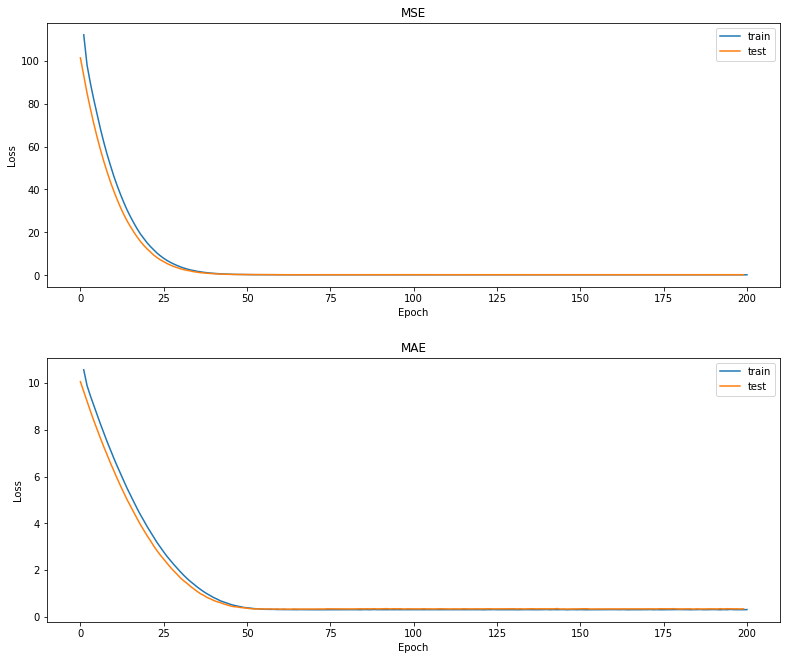

In [298]:
plot_regressor_losses(all_train_losses_regressor3, all_test_losses_regressor3, EPOCH)

> # 1.3

In [159]:
# define model
regressor5 = Regressor([REGRESSOR_FEATURE_SIZE, 256, 200, 100, 20, 1], activation_func=nn.ReLU())
print(regressor5)

# train, test model
all_train_losses_regressor5, all_test_losses_regressor5, test_outs_regressor5, test_targets_regressor5 = run_regressor(regressor5, 'MSE', optim.Adam(regressor5.parameters(), lr=0.002), regressor_train_loader, regressor_test_loader,  500)

Regressor(
  (fc_layers): ModuleList(
    (0): Linear(in_features=290, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
    (3): Linear(in_features=100, out_features=20, bias=True)
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
  (activation_func): ReLU()
)
Done!


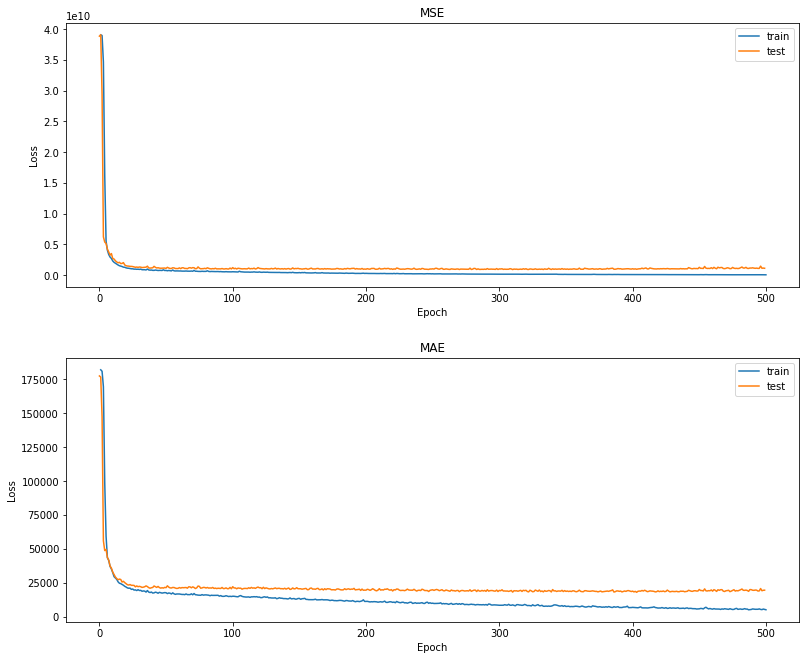

In [160]:
plot_regressor_losses(all_train_losses_regressor5, all_test_losses_regressor5, 500)

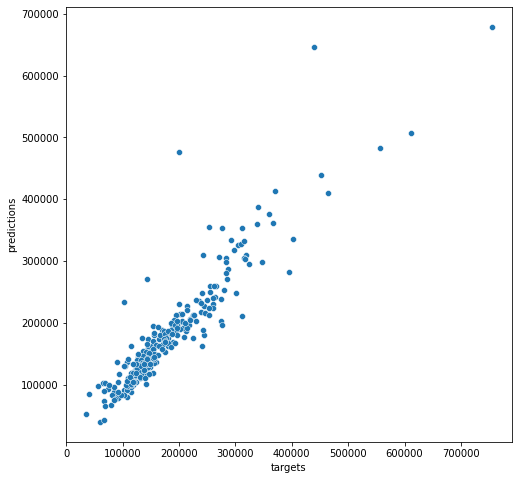

In [161]:
plot_regressor_outs(test_outs_regressor5[-1], test_targets_regressor5[-1])

In [161]:
def find_best_epoch(test_losses):
  still_loss_count = 0
  best_epoch = len(test_losses)
  for i in range(1, len(test_losses)):
    if test_losses[i] >= test_losses[i-1]:
      still_loss_count +=1
    else:
      if still_loss_count >= 0:
        still_loss_count -= 1
    if still_loss_count == 5:
      best_epoch = i
      break
  return best_epoch


In [164]:
regressor5_best_epoch = find_best_epoch(all_test_losses_regressor5['MSE'])
regressor5_best_epoch

164

> # 1.4

In [26]:
def find_best_epoch(losses, thr):
  still_loss_count = 0
  best_epoch = len(losses)
  for i in range(1, len(losses)):
    if losses[i] >= losses[i-1]:
      still_loss_count +=1
    else:
      if still_loss_count >= 0:
        still_loss_count -= 1
    if still_loss_count == thr:
      best_epoch = i
      break
  return best_epoch

In [165]:
# define model
regressor6 = Regressor([REGRESSOR_FEATURE_SIZE, 256, 200, 100, 20, 1], activation_func=nn.ReLU())
print(regressor6)

# train, test model
all_train_losses_regressor6, all_test_losses_regressor6, test_outs_regressor6, test_targets_regressor6 = run_regressor(regressor6, 'MSE', optim.Adam(regressor6.parameters(), lr=0.002), regressor_train_loader, regressor_test_loader,  500)

Regressor(
  (fc_layers): ModuleList(
    (0): Linear(in_features=290, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
    (3): Linear(in_features=100, out_features=20, bias=True)
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
  (activation_func): ReLU()
)
Done!


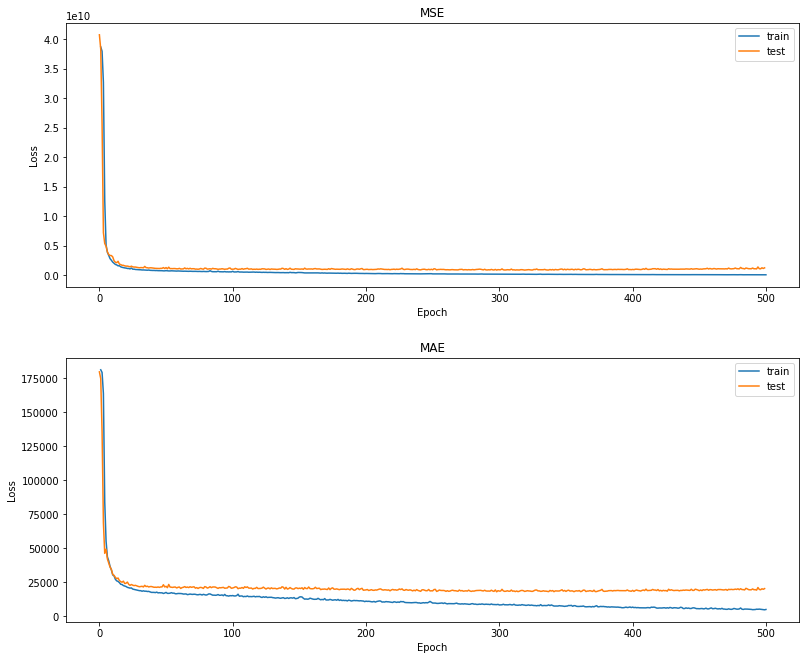

In [166]:
plot_regressor_losses(all_train_losses_regressor6, all_test_losses_regressor6, 500)

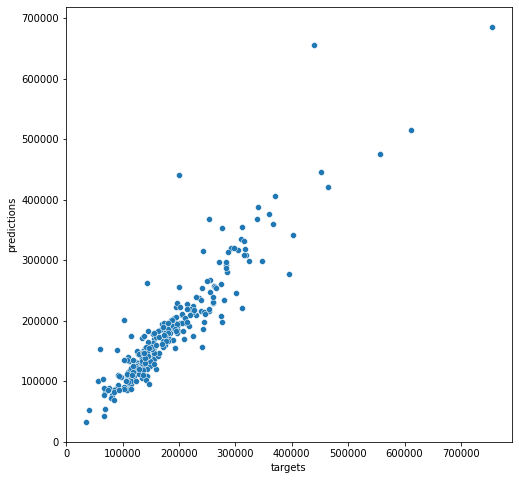

In [167]:
plot_regressor_outs(test_outs_regressor6[-1], test_targets_regressor6[-1])

In [334]:
regressor6_best_epoch = find_best_epoch(all_test_losses_regressor6['MAE'], 5)
regressor6_best_epoch

71

# **2**

> # 2.1

In [27]:
FILE_PATH_2 = '/content/drive/MyDrive/University/nn/sonar.all-data'

In [28]:
TARGET_COLUMN2 = 60

In [29]:
sonar_raw_df = pd.read_csv(FILE_PATH_2, header=None)
sonar_raw_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1

In [387]:
sonar_raw_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.0685

In [388]:
sonar_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [30]:
def encode_target(data):
  le = preprocessing.LabelEncoder()
  data[TARGET_COLUMN2] = le.fit_transform(data[TARGET_COLUMN2])

In [31]:
def preprocess_classifier_data(raw_df):
  df = raw_df.copy()  
  normalize_classifier(df)
  encode_target(df)
  return df

In [125]:
def prepare_classifier_data(train_x, train_y, test_x, test_y, valid_x, valid_y, batch_size):
  train_dataset = convert_dataframe_to_dataset(train_x, train_y)
  test_dataset = convert_dataframe_to_dataset(test_x, test_y)
  valid_dataset = convert_dataframe_to_dataset(valid_x, valid_y)
  train_loader = convert_dataset_to_dataloader(train_dataset,batch_size)
  test_loader = convert_dataset_to_dataloader(test_dataset,batch_size)
  valid_loader = convert_dataset_to_dataloader(valid_dataset,batch_size)
  return train_loader, test_loader, valid_loader, df.shape

In [33]:
class Classifier(nn.Module):
  def __init__(self, layers_size, activation_func, auto_encoder = None, auto_encode = False):
    super().__init__()
    self.fc_layers = nn.ModuleList()
    for i in range(len(layers_size)-1):
      self.fc_layers.append(nn.Linear(layers_size[i], layers_size[i+1]))
    self.activation_func = activation_func
    self.logsoftmax = nn.LogSoftmax(dim=1)
    self.dropout = nn.Dropout(p=0.2)
    self.auto_encoder = auto_encoder
    self.auto_encode = auto_encode

  def forward(self, input):
    if(self.auto_encode):
      with torch.no_grad():
        input = self.auto_encoder.encode(input)
    for i in range(len(self.fc_layers)-1):
      input = self.fc_layers[i](input)
      input = self.activation_func(input)
      input = self.dropout(input)
    
    output = self.fc_layers[-1](input)
    # output = self.logsoftmax(input)
    return output.squeeze()

In [34]:
def test_classifier(model, loader, loss_func):
  all_losses = 0
  outs = []
  all_targets = []
  with torch.no_grad():
    corrects = 0
    total = 0
    for features, targets in loader:
      prediction = model(features.float())
      labels = prediction.argmax(1)
      all_losses += loss_func(prediction, targets.long()).item()
      outs.append(labels)
      all_targets.append(targets.float())
      corrects += (labels == targets.float()).sum()
      total += len(targets)
  return float(all_losses)/float(total), float(corrects)/ float(total), outs, all_targets

In [35]:
def run_classifier(model, loss_func, optimizer, train_loader, valid_loader, epochs):
  all_train_losses = []
  all_valid_losses = []
  all_valid_outs = []
  all_valid_targets = []
  all_train_accuracies = []
  all_valid_accuracies = []

  for epoch in range(1, epochs+1):
    # print('Epoch :{} started...'.format(epoch))
    epoch_train_losses = 0
    corrects = 0
    total = 0
    for features, targets in train_loader:
      prediction = model(features.float())
      labels = prediction.argmax(1)
      loss = loss_func(prediction, targets.long())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step() 
      epoch_train_losses += loss.item()

      with torch.no_grad():
        corrects += (labels == targets.float()).sum()
        total += len(targets)
    # print(corrects, total)
    all_train_losses.append(float(epoch_train_losses)/float(total))
    all_train_accuracies.append(float(corrects)/float(total))
    valid_loss, valid_accuracy, valid_out, valid_target = test_classifier(model, valid_loader, loss_func)
    all_valid_losses.append(valid_loss)
    all_valid_outs.append(valid_out)
    all_valid_targets.append(valid_target)
    all_valid_accuracies.append(valid_accuracy)
  print('Done!')
  return all_train_losses, all_valid_losses, all_train_accuracies,  all_valid_accuracies, all_valid_outs, all_valid_targets

In [36]:
def show_classifier_train_result(train_losses, valid_losses, train_accuracies,  valid_accuracies, epochs):
  fig, (ax1, ax2) = plt.subplots(2)
  fig.set_figheight(10)
  fig.set_figwidth(12)
  fig.tight_layout(pad=5.0)

  metric = 'Loss'
  ax1.plot(range(1, epochs+1), train_losses, valid_losses)
  ax1.set_title(metric)
  ax1.set_xlabel('Epoch')
  ax1.legend(['train', 'validation'])

  metric = 'Accuracy'
  ax2.plot(range(1, epochs+1), train_accuracies, valid_accuracies)
  ax2.set_title(metric)
  ax2.set_xlabel('Epoch')
  ax2.legend(['train', 'validation'])
        

  max_train_accuracy =  np.max(train_accuracies)
  max_train_accuracy_epoch = np.argmax(train_accuracies)

  max_valid_accuracy = np.max(valid_accuracies)
  max_valid_accuracy_epoch = np.argmax(valid_accuracies)

  ax2.annotate('Maximum accuracy', xy=(max_train_accuracy_epoch, max_train_accuracy))
  ax2.annotate('Maximum accuracy', xy=(max_valid_accuracy_epoch, max_valid_accuracy))

  fig.show()

  print('Max Train Accuracy: {} in epoch {}'.format(max_train_accuracy, max_train_accuracy_epoch))
  print('Max Validation Accuracy: {} in epoch {}'.format(max_valid_accuracy, max_valid_accuracy_epoch))

In [37]:
def show_classifier_test_result(test_loss, test_accuracy, test_out, test_target):
  predictions = np.array([])
  for out in test_out:
    predictions = np.append(predictions, out.numpy())

  targets = np.array([])
  for target in test_target:
    targets = np.append(targets, target.numpy())

  print('Test Accuracy is {}'.format(test_accuracy))
  print('Test Loss is {}'.format(test_loss))
  test_confusion_matrix = confusion_matrix(y_true = targets, y_pred = predictions)
  sns.heatmap(test_confusion_matrix, cmap="PiYG", annot=True)
  print(classification_report(y_true = targets, y_pred = predictions))

In [38]:
def normalize_classifier(data):
  for col in range(0, data.columns.size-1):
    min = data[col].min()
    max = data[col].max()
    data[col] = (data[col] - min) / (max - min)

In [340]:
  df = preprocess_classifier_data(sonar_raw_df)
  train_x, test_valid_x, train_y, test_valid_y = split_data(df, 0.4, TARGET_COLUMN2)
  test_valid_df = test_valid_x.copy()
  test_valid_df[TARGET_COLUMN2] = test_valid_y
  test_x, valid_x, test_y, valid_y = split_data(test_valid_df, 0.5, TARGET_COLUMN2)

In [129]:
CLASSIFIER_BATCH_SIZE = 20
EPOCH = 150

# prepare data
classifier_train_loader, classifier_test_loader, classifier_valid_loader, classifier_final_df_shape = prepare_classifier_data(train_x, train_y, test_x, test_y, valid_x, valid_y, CLASSIFIER_BATCH_SIZE)
CLASSIFIER_FEATURE_SIZE = classifier_final_df_shape[1]-1

In [130]:
# define model
classifier1 = Classifier([CLASSIFIER_FEATURE_SIZE, 50, 30, 15, 2], activation_func=nn.ReLU())
print(classifier1)

# train, test model
loss_func = nn.CrossEntropyLoss()
all_train_losses_classifier1, all_valid_losses_classifier1, all_train_accuracies_classifier1,  all_valid_accuracies_classifier1, valid_outs_classifier1, valid_targets_classifier1 = run_classifier(classifier1, loss_func, optim.Adam(classifier1.parameters(), lr=0.002), classifier_train_loader, classifier_valid_loader,  EPOCH)

Classifier(
  (fc_layers): ModuleList(
    (0): Linear(in_features=60, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=15, bias=True)
    (3): Linear(in_features=15, out_features=2, bias=True)
  )
  (activation_func): ReLU()
  (logsoftmax): LogSoftmax(dim=1)
  (dropout): Dropout(p=0.2, inplace=False)
)
Done!


In [131]:
test_loss_classifier1, test_accuracy_classifier1, test_out_classifier1, test_target_classifier1 = test_classifier(classifier1, classifier_test_loader, loss_func)

Max Train Accuracy: 1.0 in epoch 74
Max Validation Accuracy: 0.8809523809523809 in epoch 140


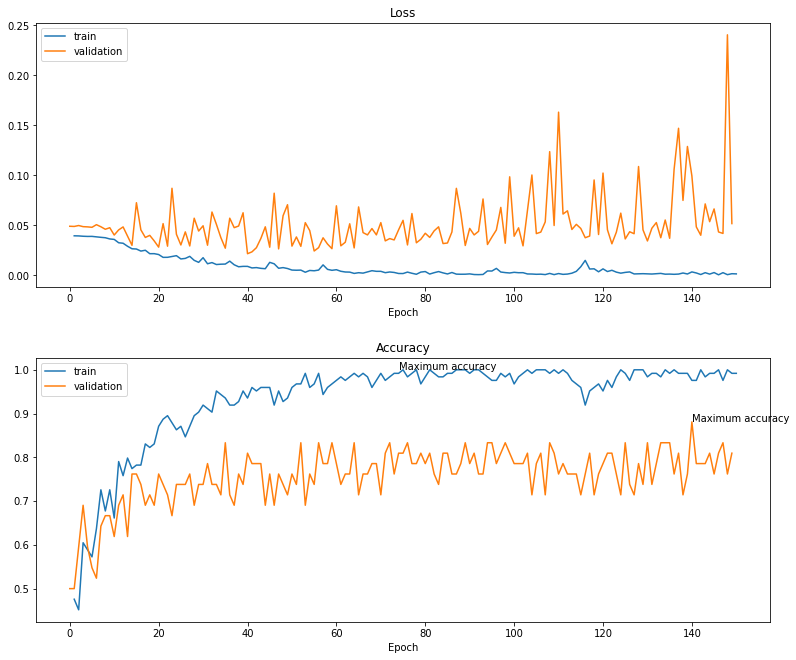

In [132]:
show_classifier_train_result(all_train_losses_classifier1, all_valid_losses_classifier1, all_train_accuracies_classifier1,  all_valid_accuracies_classifier1, EPOCH)

Test Accuracy is 0.8809523809523809
Test Loss is 0.0569814131360025
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88        22
         1.0       0.86      0.90      0.88        20

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42



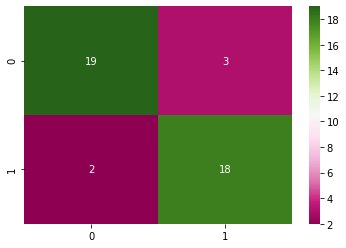

In [133]:
show_classifier_test_result(test_loss_classifier1, test_accuracy_classifier1, test_out_classifier1, test_target_classifier1)

In [136]:
classifier_best_epoch = find_best_epoch(all_valid_losses_classifier1, 5)
classifier_best_epoch

49

> # 2.6

In [138]:
CLASSIFIER_BATCH_SIZE = 32
EPOCH = 150

# prepare data
classifier_train_loader, classifier_test_loader, classifier_valid_loader, classifier_final_df_shape = prepare_classifier_data(train_x, train_y, test_x, test_y, valid_x, valid_y, CLASSIFIER_BATCH_SIZE)
CLASSIFIER_FEATURE_SIZE = classifier_final_df_shape[1]-1

In [139]:
# define model
classifier2 = Classifier([CLASSIFIER_FEATURE_SIZE, 50, 30, 15, 2], activation_func=nn.ReLU())
print(classifier2)

# train, test model
loss_func = nn.CrossEntropyLoss()
all_train_losses_classifier2, all_valid_losses_classifier2, all_train_accuracies_classifier2,  all_valid_accuracies_classifier2, valid_outs_classifier2, valid_targets_classifier2 = run_classifier(classifier2, loss_func, optim.Adam(classifier2.parameters(), lr=0.002), classifier_train_loader, classifier_valid_loader,  EPOCH)

Classifier(
  (fc_layers): ModuleList(
    (0): Linear(in_features=60, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=15, bias=True)
    (3): Linear(in_features=15, out_features=2, bias=True)
  )
  (activation_func): ReLU()
  (logsoftmax): LogSoftmax(dim=1)
  (dropout): Dropout(p=0.2, inplace=False)
)
Done!


In [140]:
test_loss_classifier2, test_accuracy_classifier2, test_out_classifier2, test_target_classifier2 = test_classifier(classifier2, classifier_test_loader, loss_func)

Max Train Accuracy: 1.0 in epoch 73
Max Validation Accuracy: 0.8571428571428571 in epoch 68


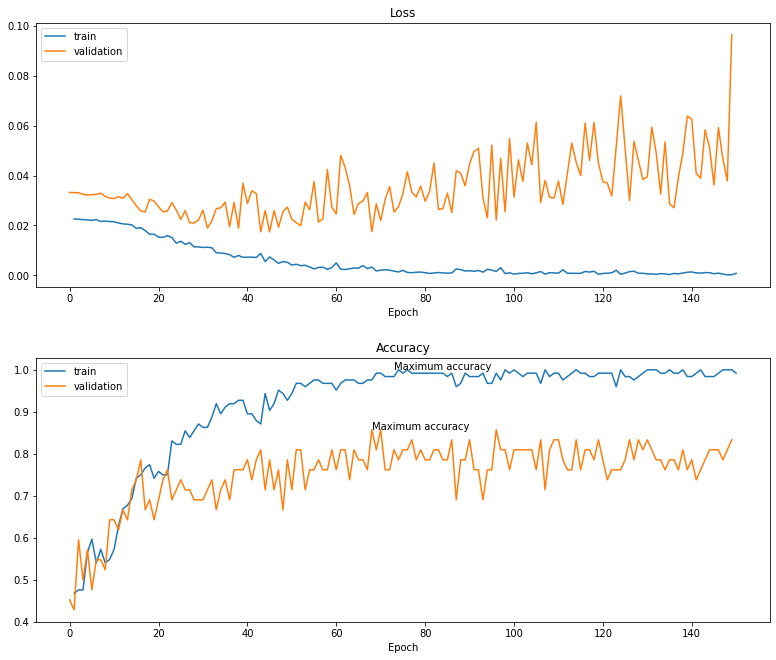

In [141]:
show_classifier_train_result(all_train_losses_classifier2, all_valid_losses_classifier2, all_train_accuracies_classifier2,  all_valid_accuracies_classifier2, EPOCH)

Test Accuracy is 0.8333333333333334
Test Loss is 0.029024192539509386
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85        22
         1.0       0.88      0.75      0.81        20

    accuracy                           0.83        42
   macro avg       0.84      0.83      0.83        42
weighted avg       0.84      0.83      0.83        42



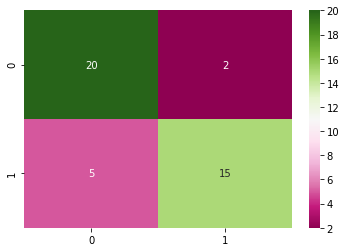

In [142]:
show_classifier_test_result(test_loss_classifier2, test_accuracy_classifier2, test_out_classifier2, test_target_classifier2)

In [163]:
CLASSIFIER_BATCH_SIZE = 64
EPOCH = 150

# prepare data
classifier_train_loader, classifier_test_loader, classifier_valid_loader, classifier_final_df_shape = prepare_classifier_data(train_x, train_y, test_x, test_y, valid_x, valid_y, CLASSIFIER_BATCH_SIZE)
CLASSIFIER_FEATURE_SIZE = classifier_final_df_shape[1]-1

In [164]:
# define model
classifier3 = Classifier([CLASSIFIER_FEATURE_SIZE, 50, 30, 15, 2], activation_func=nn.ReLU())
print(classifier3)

# train, test model
loss_func = nn.CrossEntropyLoss()
all_train_losses_classifier3, all_valid_losses_classifier3, all_train_accuracies_classifier3,  all_valid_accuracies_classifier3, valid_outs_classifier3, valid_targets_classifier3 = run_classifier(classifier3, loss_func, optim.Adam(classifier3.parameters(), lr=0.002), classifier_train_loader, classifier_valid_loader,  EPOCH)

Classifier(
  (fc_layers): ModuleList(
    (0): Linear(in_features=60, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=15, bias=True)
    (3): Linear(in_features=15, out_features=2, bias=True)
  )
  (activation_func): ReLU()
  (logsoftmax): LogSoftmax(dim=1)
  (dropout): Dropout(p=0.2, inplace=False)
)
Done!


In [165]:
test_loss_classifier3, test_accuracy_classifier3, test_out_classifier3, test_target_classifier3 = test_classifier(classifier3, classifier_test_loader, loss_func)

Max Train Accuracy: 1.0 in epoch 79
Max Validation Accuracy: 0.8571428571428571 in epoch 118


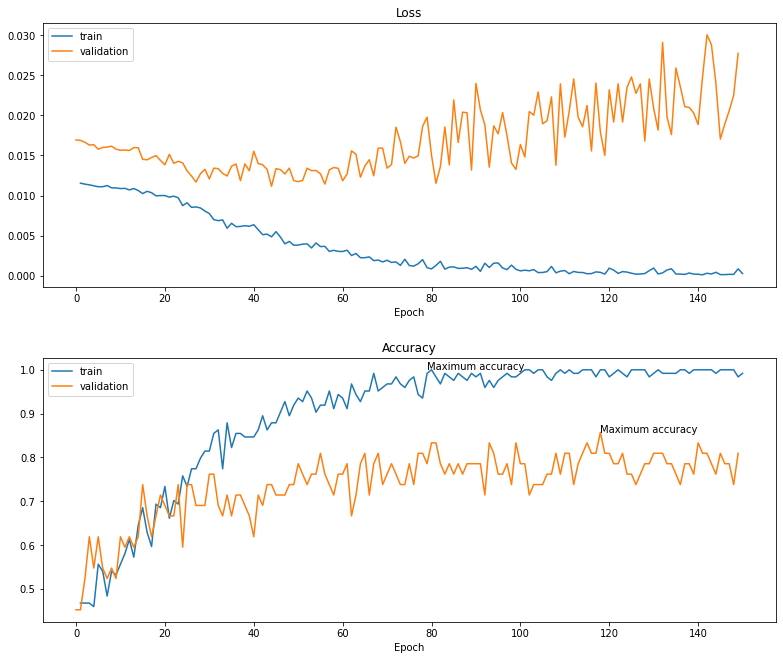

In [166]:
show_classifier_train_result(all_train_losses_classifier3, all_valid_losses_classifier3, all_train_accuracies_classifier3,  all_valid_accuracies_classifier3, EPOCH)

Test Accuracy is 0.8571428571428571
Test Loss is 0.017574995756149292
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87        22
         1.0       0.89      0.80      0.84        20

    accuracy                           0.86        42
   macro avg       0.86      0.85      0.86        42
weighted avg       0.86      0.86      0.86        42



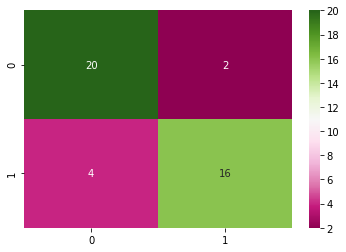

In [167]:
show_classifier_test_result(test_loss_classifier3, test_accuracy_classifier3, test_out_classifier3, test_target_classifier3)

In [168]:
CLASSIFIER_BATCH_SIZE = 128
EPOCH = 150

# prepare data
classifier_train_loader, classifier_test_loader, classifier_valid_loader, classifier_final_df_shape = prepare_classifier_data(train_x, train_y, test_x, test_y, valid_x, valid_y, CLASSIFIER_BATCH_SIZE)
CLASSIFIER_FEATURE_SIZE = classifier_final_df_shape[1]-1

In [169]:
# define model
classifier4 = Classifier([CLASSIFIER_FEATURE_SIZE, 50, 30, 15, 2], activation_func=nn.ReLU())
print(classifier4)

# train, test model
loss_func = nn.CrossEntropyLoss()
all_train_losses_classifier4, all_valid_losses_classifier4, all_train_accuracies_classifier4,  all_valid_accuracies_classifier4, valid_outs_classifier4, valid_targets_classifier4 = run_classifier(classifier4, loss_func, optim.Adam(classifier4.parameters(), lr=0.002), classifier_train_loader, classifier_valid_loader,  EPOCH)

Classifier(
  (fc_layers): ModuleList(
    (0): Linear(in_features=60, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=15, bias=True)
    (3): Linear(in_features=15, out_features=2, bias=True)
  )
  (activation_func): ReLU()
  (logsoftmax): LogSoftmax(dim=1)
  (dropout): Dropout(p=0.2, inplace=False)
)
Done!


In [170]:
test_loss_classifier4, test_accuracy_classifier4, test_out_classifier4, test_target_classifier4 = test_classifier(classifier4, classifier_test_loader, loss_func)

Max Train Accuracy: 1.0 in epoch 130
Max Validation Accuracy: 0.8333333333333334 in epoch 100


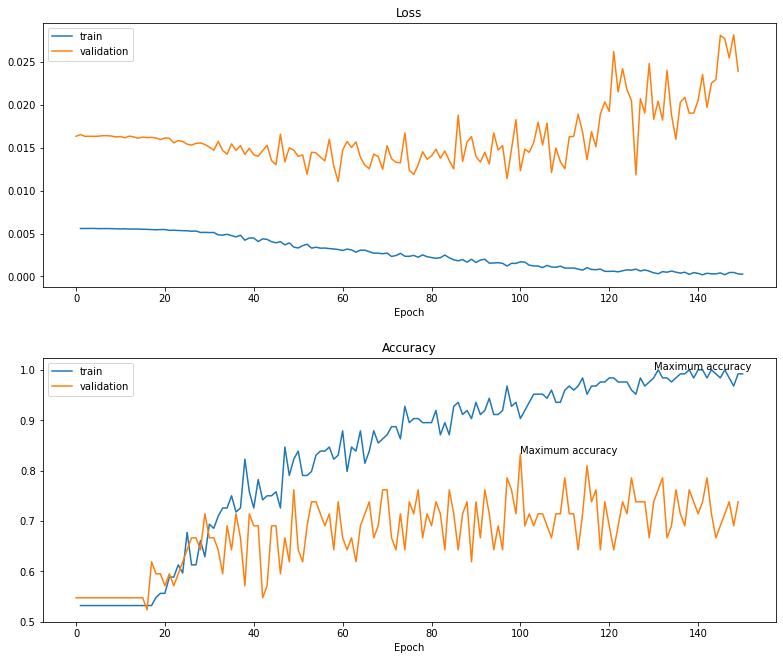

In [171]:
show_classifier_train_result(all_train_losses_classifier4, all_valid_losses_classifier4, all_train_accuracies_classifier4,  all_valid_accuracies_classifier4, EPOCH)

Test Accuracy is 0.8095238095238095
Test Loss is 0.015153392439796812
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        22
         1.0       0.80      0.80      0.80        20

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42



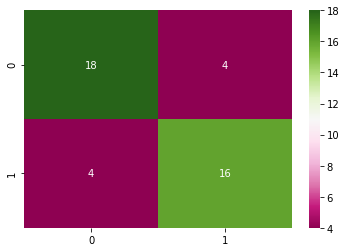

In [172]:
show_classifier_test_result(test_loss_classifier4, test_accuracy_classifier4, test_out_classifier4, test_target_classifier4)

> # 2.8

In [176]:
# define model
classifier5 = Classifier([CLASSIFIER_FEATURE_SIZE, 50, 30, 15, 2], activation_func=nn.Sigmoid())
print(classifier5)

# train, test model
loss_func = nn.CrossEntropyLoss()
all_train_losses_classifier5, all_valid_losses_classifier5, all_train_accuracies_classifier5,  all_valid_accuracies_classifier5, valid_outs_classifier5, valid_targets_classifier5 = run_classifier(classifier5, loss_func, optim.Adam(classifier5.parameters(), lr=0.002), classifier_train_loader, classifier_valid_loader,  EPOCH)

Classifier(
  (fc_layers): ModuleList(
    (0): Linear(in_features=60, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=15, bias=True)
    (3): Linear(in_features=15, out_features=2, bias=True)
  )
  (activation_func): Sigmoid()
  (logsoftmax): LogSoftmax(dim=1)
  (dropout): Dropout(p=0.2, inplace=False)
)
Done!


In [177]:
test_loss_classifier5, test_accuracy_classifier5, test_out_classifier5, test_target_classifier5 = test_classifier(classifier5, classifier_test_loader, loss_func)

Max Train Accuracy: 0.8387096774193549 in epoch 143
Max Validation Accuracy: 0.8095238095238095 in epoch 125


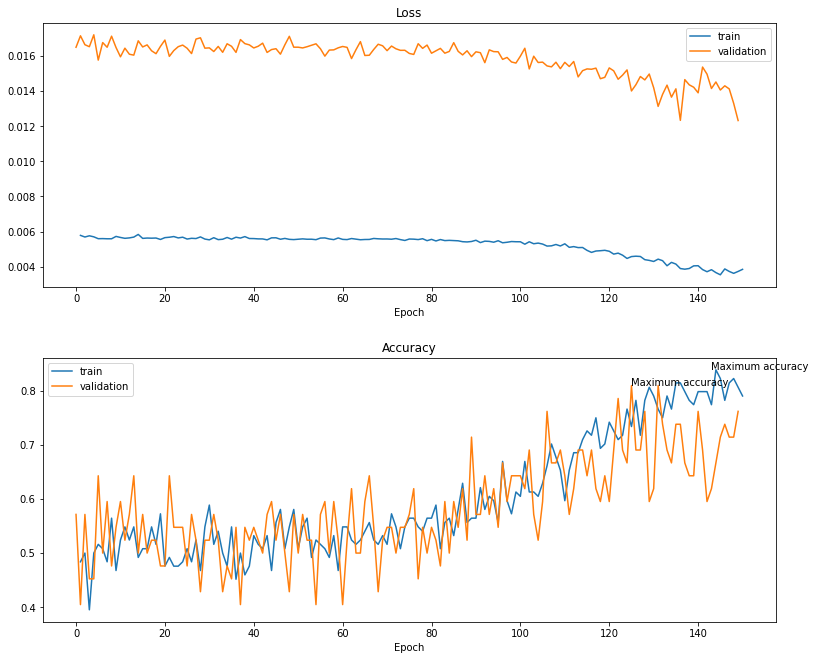

In [178]:
show_classifier_train_result(all_train_losses_classifier5, all_valid_losses_classifier5, all_train_accuracies_classifier5,  all_valid_accuracies_classifier5, EPOCH)

Test Accuracy is 0.7142857142857143
Test Loss is 0.01075766058195205
              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74        22
         1.0       0.72      0.65      0.68        20

    accuracy                           0.71        42
   macro avg       0.72      0.71      0.71        42
weighted avg       0.71      0.71      0.71        42



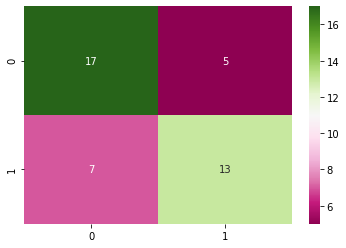

In [179]:
show_classifier_test_result(test_loss_classifier5, test_accuracy_classifier5, test_out_classifier5, test_target_classifier5)

In [180]:
# define model
classifier6 = Classifier([CLASSIFIER_FEATURE_SIZE, 50, 30, 15, 2], activation_func=nn.Tanh())
print(classifier6)

# train, test model
loss_func = nn.CrossEntropyLoss()
all_train_losses_classifier6, all_valid_losses_classifier6, all_train_accuracies_classifier6,  all_valid_accuracies_classifier6, valid_outs_classifier6, valid_targets_classifier6 = run_classifier(classifier6, loss_func, optim.Adam(classifier6.parameters(), lr=0.002), classifier_train_loader, classifier_valid_loader,  EPOCH)

Classifier(
  (fc_layers): ModuleList(
    (0): Linear(in_features=60, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=15, bias=True)
    (3): Linear(in_features=15, out_features=2, bias=True)
  )
  (activation_func): Tanh()
  (logsoftmax): LogSoftmax(dim=1)
  (dropout): Dropout(p=0.2, inplace=False)
)
Done!


In [181]:
test_loss_classifier6, test_accuracy_classifier6, test_out_classifier6, test_target_classifier6 = test_classifier(classifier6, classifier_test_loader, loss_func)

Max Train Accuracy: 0.9838709677419355 in epoch 126
Max Validation Accuracy: 0.7857142857142857 in epoch 116


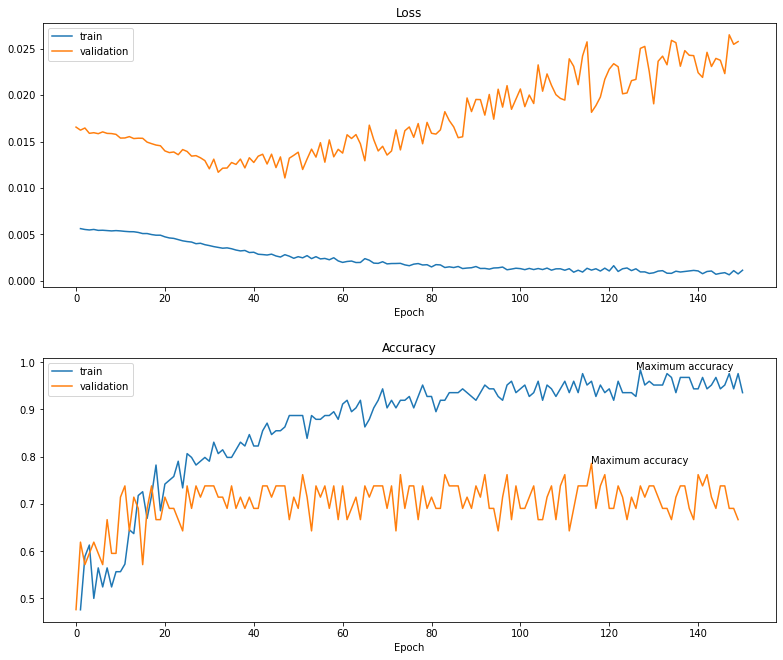

In [182]:
show_classifier_train_result(all_train_losses_classifier6, all_valid_losses_classifier6, all_train_accuracies_classifier6,  all_valid_accuracies_classifier6, EPOCH)

Test Accuracy is 0.7380952380952381
Test Loss is 0.024721829664139522
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.76        22
         1.0       0.74      0.70      0.72        20

    accuracy                           0.74        42
   macro avg       0.74      0.74      0.74        42
weighted avg       0.74      0.74      0.74        42



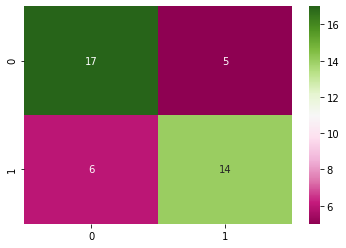

In [183]:
show_classifier_test_result(test_loss_classifier6, test_accuracy_classifier6, test_out_classifier6, test_target_classifier6)

> # 2.9

In [184]:
# define model
classifier7 = Classifier([CLASSIFIER_FEATURE_SIZE, 50, 40, 30, 15, 5, 2], activation_func=nn.ReLU())
print(classifier7)

# train, test model
loss_func = nn.CrossEntropyLoss()
all_train_losses_classifier7, all_valid_losses_classifier7, all_train_accuracies_classifier7,  all_valid_accuracies_classifier7, valid_outs_classifier7, valid_targets_classifier7 = run_classifier(classifier7, loss_func, optim.Adam(classifier7.parameters(), lr=0.002), classifier_train_loader, classifier_valid_loader,  EPOCH)

Classifier(
  (fc_layers): ModuleList(
    (0): Linear(in_features=60, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=40, bias=True)
    (2): Linear(in_features=40, out_features=30, bias=True)
    (3): Linear(in_features=30, out_features=15, bias=True)
    (4): Linear(in_features=15, out_features=5, bias=True)
    (5): Linear(in_features=5, out_features=2, bias=True)
  )
  (activation_func): ReLU()
  (logsoftmax): LogSoftmax(dim=1)
  (dropout): Dropout(p=0.2, inplace=False)
)
Done!


In [185]:
test_loss_classifier7, test_accuracy_classifier7, test_out_classifier7, test_target_classifier7 = test_classifier(classifier7, classifier_test_loader, loss_func)

Max Train Accuracy: 0.9596774193548387 in epoch 119
Max Validation Accuracy: 0.8095238095238095 in epoch 116


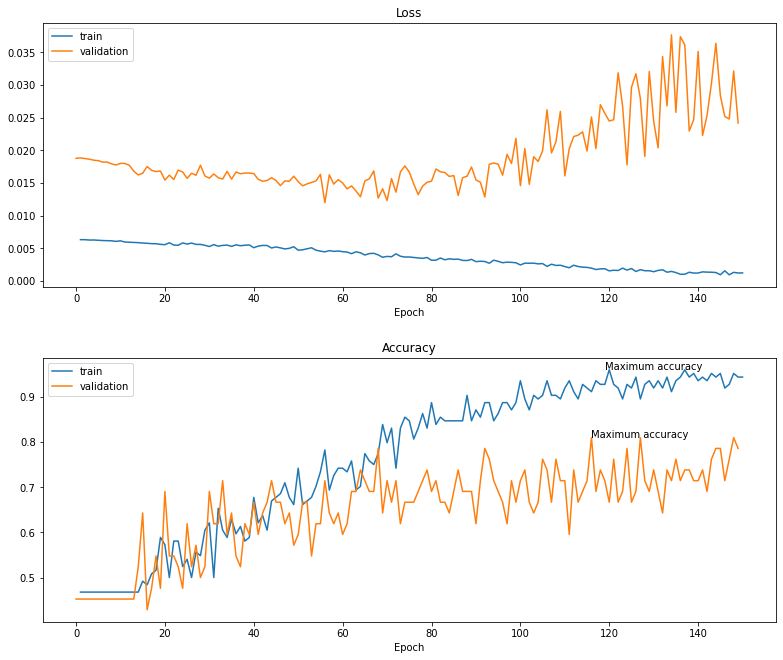

In [186]:
show_classifier_train_result(all_train_losses_classifier7, all_valid_losses_classifier7, all_train_accuracies_classifier7,  all_valid_accuracies_classifier7, EPOCH)

Test Accuracy is 0.8095238095238095
Test Loss is 0.01340825359026591
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.83        22
         1.0       0.83      0.75      0.79        20

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42



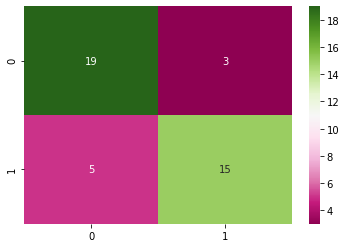

In [187]:
show_classifier_test_result(test_loss_classifier7, test_accuracy_classifier7, test_out_classifier7, test_target_classifier7)

> # 2.11

In [188]:
# define model
classifier8 = Classifier([CLASSIFIER_FEATURE_SIZE, 30, 15, 2], activation_func=nn.ReLU())
print(classifier8)

# train, test model
loss_func = nn.CrossEntropyLoss()
all_train_losses_classifier8, all_valid_losses_classifier8, all_train_accuracies_classifier8,  all_valid_accuracies_classifier8, valid_outs_classifier8, valid_targets_classifier8 = run_classifier(classifier8, loss_func, optim.Adam(classifier8.parameters(), lr=0.002), classifier_train_loader, classifier_valid_loader,  EPOCH)

Classifier(
  (fc_layers): ModuleList(
    (0): Linear(in_features=60, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=15, bias=True)
    (2): Linear(in_features=15, out_features=2, bias=True)
  )
  (activation_func): ReLU()
  (logsoftmax): LogSoftmax(dim=1)
  (dropout): Dropout(p=0.2, inplace=False)
)
Done!


In [189]:
test_loss_classifier8, test_accuracy_classifier8, test_out_classifier8, test_target_classifier8 = test_classifier(classifier8, classifier_test_loader, loss_func)

Max Train Accuracy: 0.967741935483871 in epoch 137
Max Validation Accuracy: 0.8095238095238095 in epoch 146


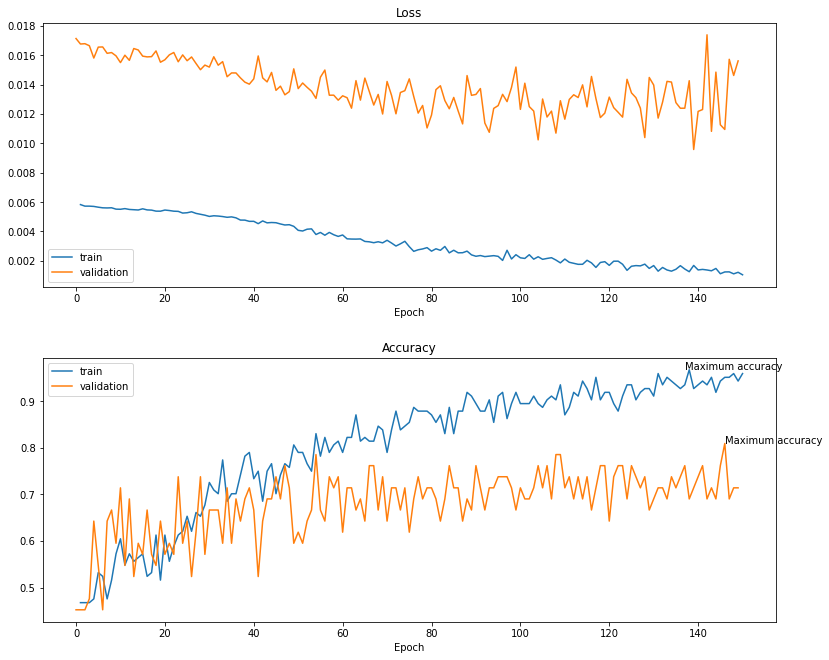

In [190]:
show_classifier_train_result(all_train_losses_classifier8, all_valid_losses_classifier8, all_train_accuracies_classifier8,  all_valid_accuracies_classifier8, EPOCH)

Test Accuracy is 0.8095238095238095
Test Loss is 0.012281109889348349
              precision    recall  f1-score   support

         0.0       0.89      0.73      0.80        22
         1.0       0.75      0.90      0.82        20

    accuracy                           0.81        42
   macro avg       0.82      0.81      0.81        42
weighted avg       0.82      0.81      0.81        42



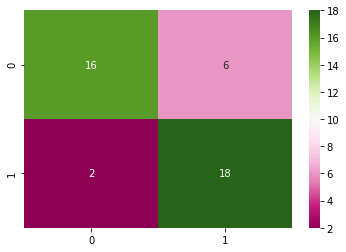

In [191]:
show_classifier_test_result(test_loss_classifier8, test_accuracy_classifier8, test_out_classifier8, test_target_classifier8)

# **3**

> # 3.1

In [196]:
house_price_raw_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

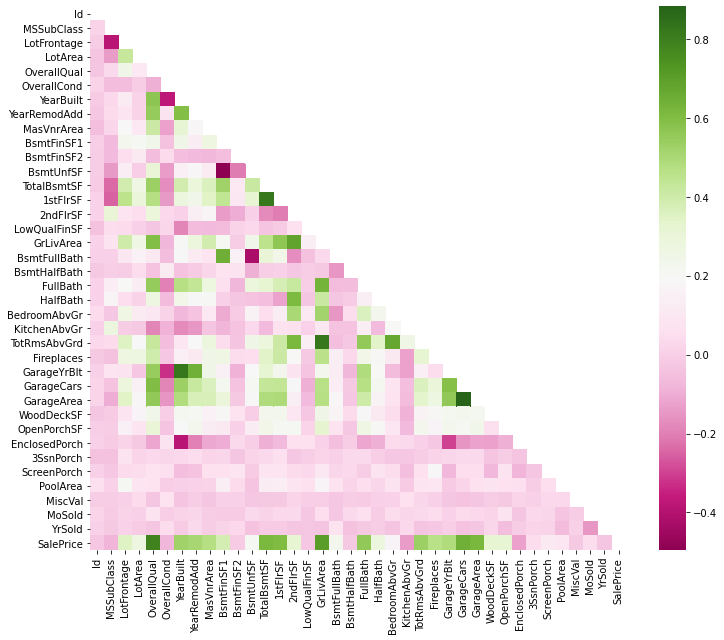

In [419]:
plt.figure(figsize=(12, 10))
matrix = np.triu(house_price_raw_df.corr())
sns.heatmap(house_price_raw_df.corr(), cmap='PiYG', mask=matrix)

> # 3.2

In [197]:
house_price_df = preprocess_regressor_data(house_price_raw_df)

In [201]:
house_price_train_x, house_price_test_x, house_price_train_y, house_price_test_y = split_data(house_price_df, 0.2, TARGET_COLUMN1)

In [202]:
def show_lr_feature_importance(train_x, train_y, number):
  model = LinearRegression()
  model.fit(train_x, train_y)
  intercept = model.intercept_
  coefficient = model.coef_
  features = pd.DataFrame(coefficient, train_x.columns, columns=['coefficient'])
  features.coefficient = features.coefficient.abs()
  stdevs = []
  for i in train_x.columns:
    stdev = train_x[i].std()
    stdevs.append(stdev)
  features['stdev'] = np.array(stdevs).reshape(-1,1)
  features['importance'] = features['coefficient'] * features['stdev']
  features['importance_normalized'] = 100*features['importance'] / features['importance'].max()

  plt.figure(figsize=(15, 10))
  features = features.sort_values(by='importance_normalized', ascending=False)
  plt.bar(features.head(number).index, features.head(number)['importance_normalized'], width=0.3, align='center')

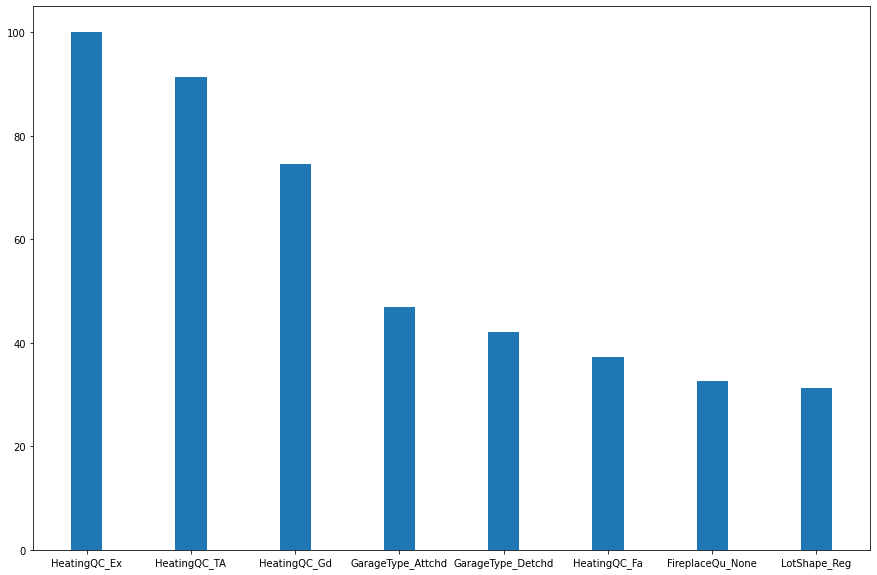

In [203]:
show_lr_feature_importance(house_price_train_x, house_price_train_y, 8)

In [204]:
def show_dt_feature_importance(train_x, train_y, number):
  model = DecisionTreeRegressor()
  model.fit(train_x, train_y)
  importance = model.feature_importances_
  features = pd.DataFrame(importance, train_x.columns, columns=['importance'])
  plt.figure(figsize=(15, 10))
  features = features.sort_values(by='importance', ascending=False)
  plt.bar(features.head(number).index, features.head(number)['importance'], width=0.3, align='center')

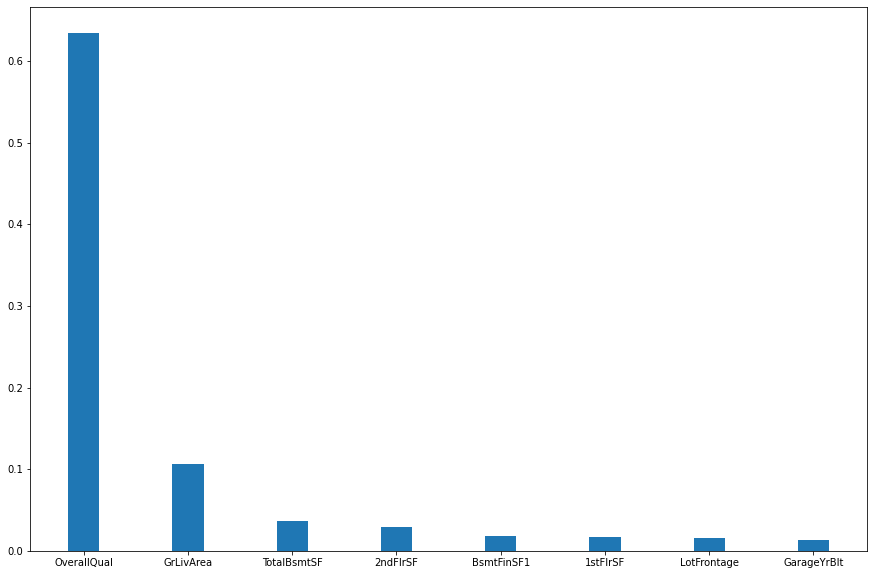

In [205]:
show_dt_feature_importance(house_price_train_x, house_price_train_y, 8)

> # 3.3

In [206]:
def backward_elimination(train_x, train_y, P_VALUE_MAX = 0.05):
  X_train = train_x.copy()
  Y_train = train_y.copy()
  X_train['bias'] = np.ones([X_train.shape[0],1]).astype(int)
  eliminated_features = []
  start = time.time()
  while(True):
    model = sm.OLS(Y_train, X_train)
    outs = model.fit()
    pvalues = outs.pvalues
    max_pvalue_feature = pvalues.idxmax()
    max_pvalue = pvalues.max()
    if max_pvalue > P_VALUE_MAX:
      eliminated_features.append(max_pvalue_feature)
      X_train = X_train.drop(max_pvalue_feature, axis=1)
    else:
      break
  end = time.time()
  return eliminated_features, end - start

In [207]:
eliminated_features, duration = backward_elimination(house_price_train_x, house_price_train_y)

In [278]:
for i in range(len(eliminated_features)):
  print(eliminated_features[i], end=', ')

Exterior1st_AsphShn, Neighborhood_Somerst, BsmtFinType1_GLQ, GarageType_Basment, BldgType_2fmCon, Exterior1st_CemntBd, Exterior1st_Wd Sdng, Exterior1st_Stucco, Exterior2nd_AsphShn, Exterior2nd_HdBoard, SaleCondition_Partial, Exterior2nd_CBlock, Exterior1st_CBlock, Neighborhood_Blueste, LowQualFinSF, Condition1_PosA, Condition1_Feedr, HouseStyle_SLvl, Heating_Floor, Heating_GasA, FireplaceQu_Po, FireplaceQu_None, SaleCondition_AdjLand, ExterCond_Po, RoofMatl_Membran, Functional_Mod, Functional_Maj2, OpenPorchSF, EnclosedPorch, HouseStyle_1.5Fin, Fence_MnPrv, Exterior2nd_VinylSd, Exterior1st_VinylSd, MasVnrType_BrkCmn, MSZoning_RM, Foundation_CBlock, ExterCond_Ex, Neighborhood_BrDale, MSZoning_RL, SaleType_ConLD, SaleType_Oth, SaleType_CWD, SaleType_Con, MiscVal, BsmtFinType2_GLQ, BsmtFinType2_ALQ, LotConfig_Corner, LotConfig_Inside, RoofStyle_Mansard, HeatingQC_Po, GarageType_Detchd, Exterior2nd_MetalSd, Electrical_Mix, Exterior2nd_Wd Shng, Exterior1st_BrkComm, Exterior2nd_Brk Cmn, Cent

In [208]:
for i in range(len(eliminated_features)):
  print('{} is eliminated in {} round.'.format(eliminated_features[i], i+1))
print('Total time for elimination is: {}'.format(duration))

Exterior1st_AsphShn is eliminated in 1 round.
Neighborhood_Somerst is eliminated in 2 round.
BsmtFinType1_GLQ is eliminated in 3 round.
GarageType_Basment is eliminated in 4 round.
BldgType_2fmCon is eliminated in 5 round.
Exterior1st_CemntBd is eliminated in 6 round.
Exterior1st_Wd Sdng is eliminated in 7 round.
Exterior1st_Stucco is eliminated in 8 round.
Exterior2nd_AsphShn is eliminated in 9 round.
Exterior2nd_HdBoard is eliminated in 10 round.
SaleCondition_Partial is eliminated in 11 round.
Exterior2nd_CBlock is eliminated in 12 round.
Exterior1st_CBlock is eliminated in 13 round.
Neighborhood_Blueste is eliminated in 14 round.
LowQualFinSF is eliminated in 15 round.
Condition1_PosA is eliminated in 16 round.
Condition1_Feedr is eliminated in 17 round.
HouseStyle_SLvl is eliminated in 18 round.
Heating_Floor is eliminated in 19 round.
Heating_GasA is eliminated in 20 round.
FireplaceQu_Po is eliminated in 21 round.
FireplaceQu_None is eliminated in 22 round.
SaleCondition_AdjLand

In [209]:
def prepare_elimination_data(x_train_df, y_train_df, x_test_df, y_test_df, batch_size):
  train_dataset = convert_dataframe_to_dataset(x_train_df, y_train_df)
  test_dataset = convert_dataframe_to_dataset(x_test_df, y_test_df)

  train_loader = convert_dataset_to_dataloader(train_dataset, batch_size=batch_size)
  test_loader = convert_dataset_to_dataloader(test_dataset, batch_size=batch_size)
  return train_loader, test_loader, x_train_df.shape

In [210]:
eliminated_features.remove('bias')
house_price_train_x = house_price_train_x.drop(eliminated_features, axis=1)
house_price_test_x = house_price_test_x.drop(eliminated_features, axis=1)

In [447]:
BATCH_SIZE = 64
EPOCH = 200

# prepare data
elimination_train_loader, elimination_test_loader, final_df_shape = prepare_elimination_data(house_price_train_x, house_price_train_y, house_price_test_x, house_price_test_y, BATCH_SIZE)
FEATURE_SIZE = final_df_shape[1]

In [448]:
# define model
elimination_model1 = Regressor([FEATURE_SIZE, 200, 100, 20, 1], activation_func=nn.ReLU())
print(elimination_model1)

# train, test model
start = time.time()
all_train_losses_el1, all_test_losses_el1, test_outs_el1, test_targets_el1 = run_regressor(elimination_model1, 'MSE', optim.Adam(elimination_model1.parameters(), lr=0.002), elimination_train_loader, elimination_test_loader,  EPOCH)
end = time.time()

Regressor(
  (fc_layers): ModuleList(
    (0): Linear(in_features=68, out_features=200, bias=True)
    (1): Linear(in_features=200, out_features=100, bias=True)
    (2): Linear(in_features=100, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=1, bias=True)
  )
  (activation_func): ReLU()
)
Done!


In [451]:
print(end - start)

8.981363534927368


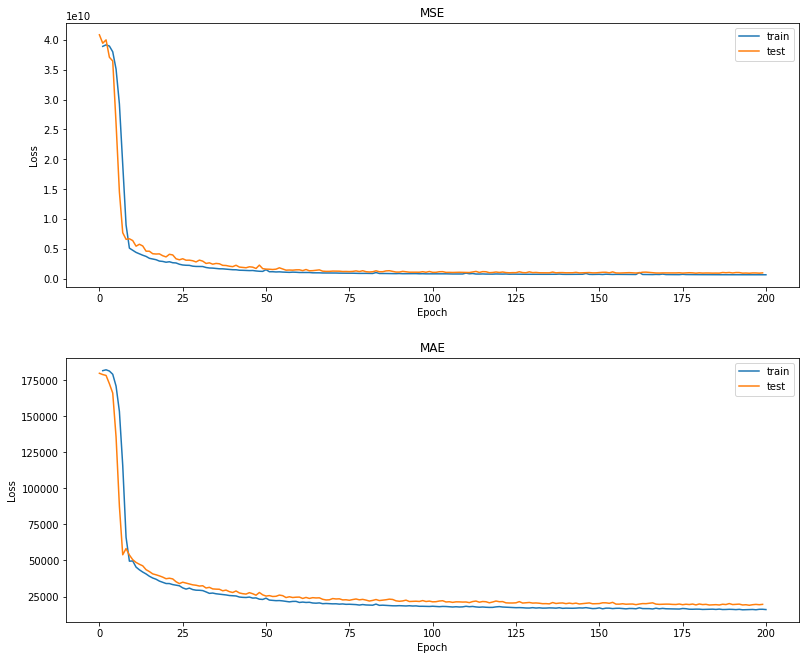

In [449]:
plot_regressor_losses(all_train_losses_el1, all_test_losses_el1, EPOCH)

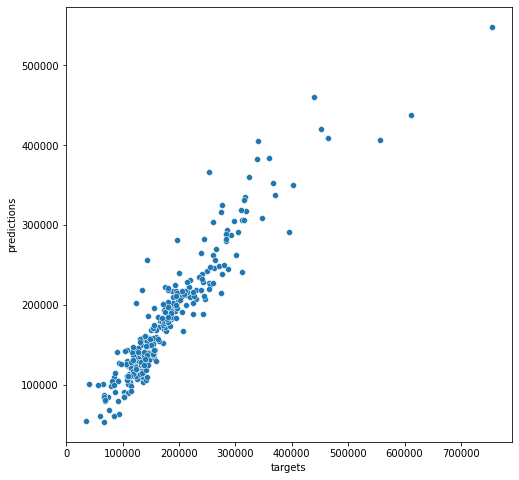

In [450]:
plot_regressor_outs(test_outs_el1[-1], test_targets_el1[-1])

> # 3.4

In [212]:
sonar_raw_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1

In [341]:
REDUCED_FEATURE_SIZE = 30

In [342]:
CLASSIFIER_BATCH_SIZE = 64
EPOCH = 150

# prepare data
classifier_train_loader, classifier_test_loader, classifier_valid_loader, classifier_final_df_shape = prepare_classifier_data(train_x, train_y, test_x, test_y, valid_x, valid_y, CLASSIFIER_BATCH_SIZE)
CLASSIFIER_FEATURE_SIZE = classifier_final_df_shape[1] -1

In [343]:
# define model
best_classifier = Classifier([CLASSIFIER_FEATURE_SIZE, 50, 30, 15, 2], activation_func=nn.ReLU())
print(best_classifier)

# train, test model
best_classifier_train_start = time.time()
loss_func = nn.CrossEntropyLoss()
all_train_losses_best_classifier, all_valid_losses_best_classifier, all_train_accuracies_best_classifier,  all_valid_accuracies_best_classifier, valid_outs_best_classifier, valid_targets_best_classifier = run_classifier(best_classifier, loss_func, optim.Adam(best_classifier.parameters(), lr=0.002), classifier_train_loader, classifier_valid_loader,  EPOCH)
best_classifier_train_end = time.time()
best_classifier_train_duration = best_classifier_train_end - best_classifier_train_start

Classifier(
  (fc_layers): ModuleList(
    (0): Linear(in_features=60, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=15, bias=True)
    (3): Linear(in_features=15, out_features=2, bias=True)
  )
  (activation_func): ReLU()
  (logsoftmax): LogSoftmax(dim=1)
  (dropout): Dropout(p=0.2, inplace=False)
)
Done!


In [344]:
test_loss_best_classifier, test_accuracy_best_classifier, test_out_best_classifier, test_target_best_classifier = test_classifier(best_classifier, classifier_test_loader, loss_func)

In [345]:
test_accuracy_best_classifier

0.8095238095238095

In [333]:
def apply_pca(x_train, y_train, x_test, x_valid):
  start = time.time()
  pca = PCA(n_components=REDUCED_FEATURE_SIZE)
  pca.fit(x_train, y_train)
  reduced_x_train = pca.transform(x_train)
  reduced_x_test = pca.transform(x_test)
  reduced_x_valid = pca.transform(x_valid)
  end = time.time()

  return reduced_x_train, reduced_x_test, reduced_x_valid, end-start

In [358]:
sonar_pca_train_x, sonar_pca_test_x, sonar_pca_valid_x, pca_duration =  apply_pca(train_x, train_y, test_x, valid_x)

In [359]:
sonar_pca_train_x = pd.DataFrame(sonar_pca_train_x)
sonar_pca_train_y = pd.DataFrame(train_y)
sonar_pca_test_x = pd.DataFrame(sonar_pca_test_x)
sonar_pca_test_y = pd.DataFrame(test_y)
sonar_pca_valid_x = pd.DataFrame(sonar_pca_valid_x)
sonar_pca_valid_y = pd.DataFrame(valid_y)

In [360]:
CLASSIFIER_BATCH_SIZE = 64
EPOCH = 150

# prepare data
classifier_train_pca_loader, classifier_test_pca_loader, classifier_valid_pca_loader, classifier_final_pca_df_shape = prepare_classifier_data(sonar_pca_train_x, sonar_pca_train_y.squeeze(), sonar_pca_test_x, sonar_pca_test_y.squeeze(), sonar_pca_valid_x, sonar_pca_valid_y.squeeze(), CLASSIFIER_BATCH_SIZE)
# CLASSIFIER_PCA_FEATURE_SIZE = classifier_final_pca_df_shape[1]

In [361]:
# define model
pca_classifier = Classifier([REDUCED_FEATURE_SIZE, 50, 30, 15, 2], activation_func=nn.ReLU())
print(pca_classifier)

# train, test model
pca_classifier_train_start = time.time()
loss_func = nn.CrossEntropyLoss()
all_train_losses_pca_classifier, all_valid_losses_pca_classifier, all_train_accuracies_pca_classifier,  all_valid_accuracies_pca_classifier, valid_outs_pca_classifier, valid_targets_pca_classifier = run_classifier(pca_classifier, loss_func, optim.Adam(pca_classifier.parameters(), lr=0.002), classifier_train_pca_loader, classifier_valid_pca_loader,  EPOCH)
pca_classifier_train_end = time.time()
pca_classifier_train_duration = pca_classifier_train_end - pca_classifier_train_start

Classifier(
  (fc_layers): ModuleList(
    (0): Linear(in_features=30, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=15, bias=True)
    (3): Linear(in_features=15, out_features=2, bias=True)
  )
  (activation_func): ReLU()
  (logsoftmax): LogSoftmax(dim=1)
  (dropout): Dropout(p=0.2, inplace=False)
)
Done!


In [362]:
test_loss_pca_classifier, test_accuracy_pca_classifier, test_out_pca_classifier, test_target_pca_classifier = test_classifier(pca_classifier, classifier_test_pca_loader, loss_func)

In [363]:
test_accuracy_pca_classifier

0.8333333333333334

In [315]:
class Autoencoder(nn.Module):
  def __init__(self, layers_size, activation_func):
    super().__init__()
    self.encode_layers = nn.ModuleList()
    for i in range(len(layers_size)-1):
      self.encode_layers.append(nn.Linear(layers_size[i], layers_size[i+1]))
    self.decode_layers = nn.ModuleList()
    for i in range(len(layers_size)-1, 0, -1):
      self.decode_layers.append(nn.Linear(layers_size[i], layers_size[i-1]))
    self.activation_func = activation_func

  def encode(self, input):
    for i in range(len(self.encode_layers)):
      input = self.encode_layers[i](input)
      output = self.activation_func(input)
    return output

  def decode(self, input):
    for i in range(len(self.decode_layers)):
      input = self.decode_layers[i](input)
      input = self.activation_func(input)
    return input

  def forward(self, input):
    input = self.encode(input)
    output = self.decode(input)
    return output

In [316]:
def run_auto_encoder(model, loss_func, optimizer, train_loader, epochs):
  all_train_losses = []
  all_train_accuracies = []

  for epoch in range(1, epochs+1):
    # print('Epoch :{} started...'.format(epoch))
    epoch_train_losses = []
    corrects = 0
    total = 0
    for features, targets in train_loader:
      prediction = model(features.float())
      labels = prediction.argmax(1)
      loss = loss_func(prediction, targets.long())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step() 
      epoch_train_losses.append(loss.item())

      with torch.no_grad():
        corrects += (labels == targets.float()).sum()
        total += len(targets)
    # print(corrects, total)
    all_train_losses.append(np.mean(epoch_train_losses))
    all_train_accuracies.append(float(corrects)/float(total))
  print('Done!')
  return all_train_losses, all_train_accuracies

In [354]:
# define model
auto_encoder1 = Autoencoder([CLASSIFIER_FEATURE_SIZE, 50, 40, REDUCED_FEATURE_SIZE], nn.ReLU())
print(auto_encoder1)

# train, test model
auto_encoder_train_start = time.time()
loss_func = nn.CrossEntropyLoss()
all_train_losses_auto_encoder1, all_train_accuracies_auto_encoder1 = run_auto_encoder(auto_encoder1, loss_func, optim.Adam(auto_encoder1.parameters(), lr=0.002), classifier_train_loader,  100)
auto_encoder_train_end = time.time()
auto_encoder_train_duration = auto_encoder_train_end - auto_encoder_train_start

Autoencoder(
  (encode_layers): ModuleList(
    (0): Linear(in_features=60, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=40, bias=True)
    (2): Linear(in_features=40, out_features=30, bias=True)
  )
  (decode_layers): ModuleList(
    (0): Linear(in_features=30, out_features=40, bias=True)
    (1): Linear(in_features=40, out_features=50, bias=True)
    (2): Linear(in_features=50, out_features=60, bias=True)
  )
  (activation_func): ReLU()
)
Done!


Max Train Accuracy: 0.9032258064516129 in epoch 97
Max Validation Accuracy: 0 in epoch 0


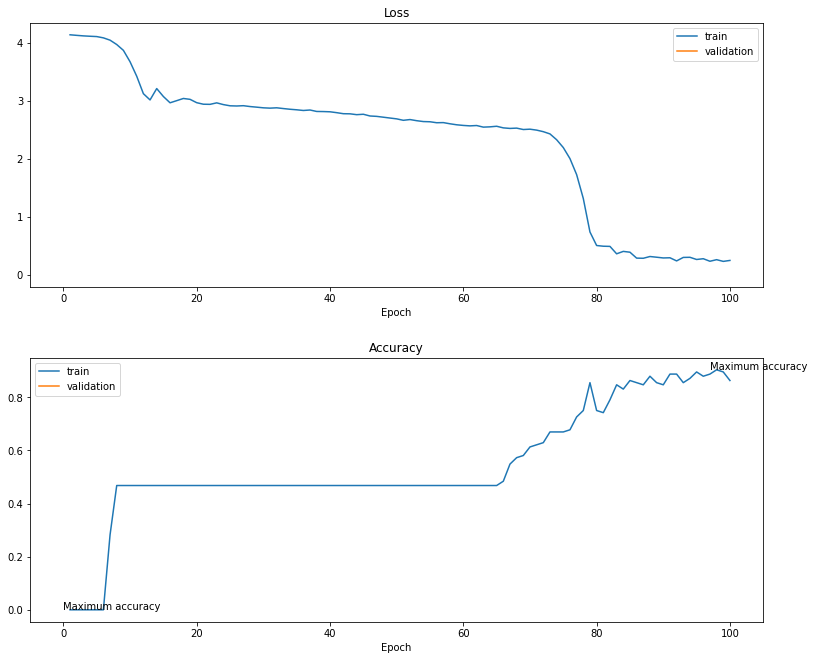

In [318]:
show_classifier_train_result(all_train_losses_auto_encoder1, [0], all_train_accuracies_auto_encoder1,  [0], 100)

In [355]:
# define model
auc_classifier = Classifier([REDUCED_FEATURE_SIZE, 50, 30, 15, 2], nn.Sigmoid(), auto_encoder1, True)
print(auc_classifier)

# train, test model
auc_classifier_train_start = time.time()
loss_func = nn.CrossEntropyLoss()
all_train_losses_auc_classifier, all_valid_losses_auc_classifier, all_train_accuracies_auc_classifier,  all_valid_accuracies_auc_classifier, valid_outs_auc_classifier, valid_targets_auc_classifier = run_classifier(auc_classifier, loss_func, optim.Adam(auc_classifier.parameters(), lr=0.002), classifier_train_loader, classifier_valid_loader,  EPOCH)
auc_classifier_train_end = time.time()
auc_classifier_train_duration = auc_classifier_train_end - auc_classifier_train_start

Classifier(
  (fc_layers): ModuleList(
    (0): Linear(in_features=30, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=15, bias=True)
    (3): Linear(in_features=15, out_features=2, bias=True)
  )
  (activation_func): Sigmoid()
  (logsoftmax): LogSoftmax(dim=1)
  (dropout): Dropout(p=0.2, inplace=False)
  (auto_encoder): Autoencoder(
    (encode_layers): ModuleList(
      (0): Linear(in_features=60, out_features=50, bias=True)
      (1): Linear(in_features=50, out_features=40, bias=True)
      (2): Linear(in_features=40, out_features=30, bias=True)
    )
    (decode_layers): ModuleList(
      (0): Linear(in_features=30, out_features=40, bias=True)
      (1): Linear(in_features=40, out_features=50, bias=True)
      (2): Linear(in_features=50, out_features=60, bias=True)
    )
    (activation_func): ReLU()
  )
)
Done!


In [356]:
test_loss_auc_classifier, test_accuracy_auc_classifier, test_out_auc_classifier, test_target_auc_classifier = test_classifier(auc_classifier, classifier_test_loader, loss_func)

In [357]:
test_accuracy_auc_classifier

0.7857142857142857

In [364]:
print('Best Classifier:')
print('Accuracy: {}'.format(test_accuracy_best_classifier))
print('Loss: {}'.format(test_loss_best_classifier))
print('Time: {}'.format(best_classifier_train_duration))

print('PCA Classifier:')
print('Accuracy: {}'.format(test_accuracy_pca_classifier))
print('Loss: {}'.format(test_loss_pca_classifier))
print('Time: {}'.format(pca_classifier_train_duration + pca_duration))

print('Auto Encoder Classifier:')
print('Accuracy: {}'.format(test_accuracy_auc_classifier))
print('Loss: {}'.format(test_loss_auc_classifier))
print('Time: {}'.format(auc_classifier_train_duration + auto_encoder_train_duration))

Best Classifier:
Accuracy: 0.8095238095238095
Loss: 0.023245740504491897
Time: 0.8241732120513916
PCA Classifier:
Accuracy: 0.8333333333333334
Loss: 0.024888796465737478
Time: 0.8050298690795898
Auto Encoder Classifier:
Accuracy: 0.7857142857142857
Loss: 0.010341911088852655
Time: 1.5892016887664795
